https://twitter.com/snap_tck/status/1463455803709423617 の確認

In [1]:
using Distributions
using Roots
using Plots
using StatsFuns

In [2]:
?logistic

search: logistic Logistic



```julia
logistic(x)

```

The [logistic](https://en.wikipedia.org/wiki/Logistic_function) sigmoid function mapping a real number to a value in the interval $[0,1]$,

$$
\sigma(x) = \frac{1}{e^{-x} + 1} = \frac{e^x}{1+e^x}.
$$

Its inverse is the [`logit`](@ref) function.


In [3]:
ccdf(Binomial(1608, 0.001), 1 - 1)

0.7998732846686536

In [4]:
ccdf(Binomial(1609, 0.001), 1 - 1)

0.8000734113839849

In [5]:
ccdf(Binomial(2000, 0.001), 1 - 1)

0.8648000746025003

In [6]:
n = 16000
p = 0.001
bin = Binomial(n, p)
cdf(bin, 0.5n*p), ccdf(bin, 1.5n*p - 1)

(0.021939318156404288, 0.036610210241716665)

In [7]:
normal = Normal(mean(bin), std(bin))
cdf(normal, n*(p - 0.0005)), ccdf(normal, n*(p + 0.0005))

(0.022696154499666343, 0.022696154499666343)

In [8]:
2*√(0.001(1 - 0.001))/√1600

0.001580348062927911

In [9]:
2*√(0.001(1 - 0.001))/√4000

0.000999499874937461

In [10]:
2*√(0.001(1 - 0.001))/√16000

0.0004997499374687305

In [11]:
x ⪅ y = x < y || x ≈ y

function pval(n, p, k)
    bin = Binomial(n, p)
    p0 = pdf(bin, k)
    min(1, sum(pdf(bin, j) for j in support(bin) if pdf(bin, j) ⪅ p0))
end

function ci(n, k, α = 0.05)
    CI = logistic.(find_zeros(t -> pval(n, logistic(t), k) - α, -50, 50))
end

ci (generic function with 2 methods)

In [12]:
CI = ci(16000, 16)

2-element Vector{Float64}:
 0.0006001276770968745
 0.0016157206168289175

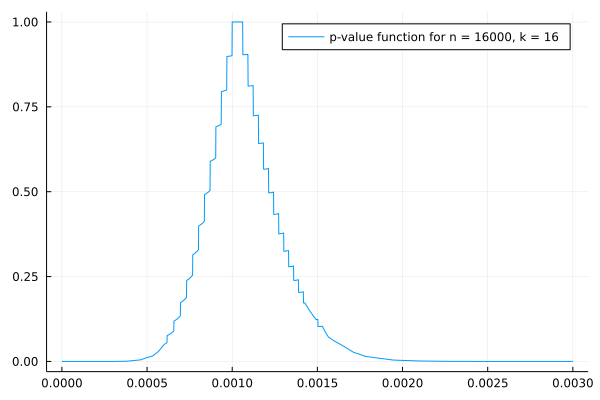

In [13]:
plot(p -> pval(16000, p, 16), 0, 0.003; label="p-value function for n = 16000, k = 16")
plot!(; xtick=0:0.0005:0.003)